# Calibrate the m16 distances for alignment with camera feed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

First run (front car moving right to left)

In [2]:
m16_detections1 = pd.read_csv('../Data/Mar10_2018/0003.csv')
video_feed1 = cv2.VideoCapture()
video_feed1.open('../Data/Mar10_2018/0003.avi')

IOError: File ../Data/Mar10_2018/0003.csv does not exist

In [3]:
def get_frame(video_feed, frame_num):
    """Get a single frame from video feed"""
    video_feed.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    _ , frame = video_feed.read()
    return frame

# Let's take a look at the sensor readings

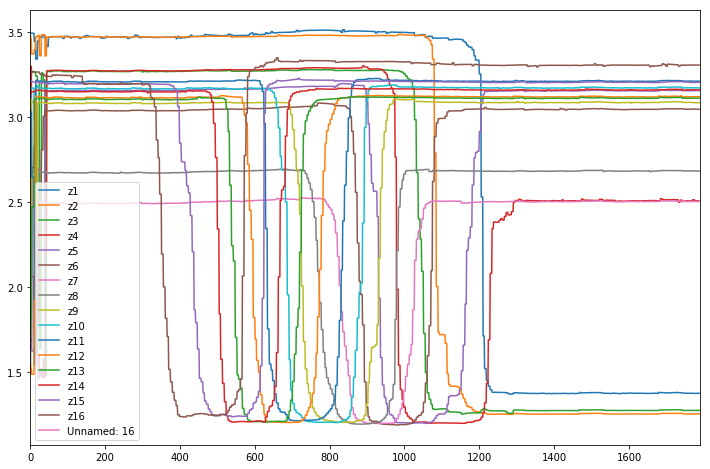

In [4]:
m16_detections1.plot(figsize=(12,8))

## Now take a look at a single sensor

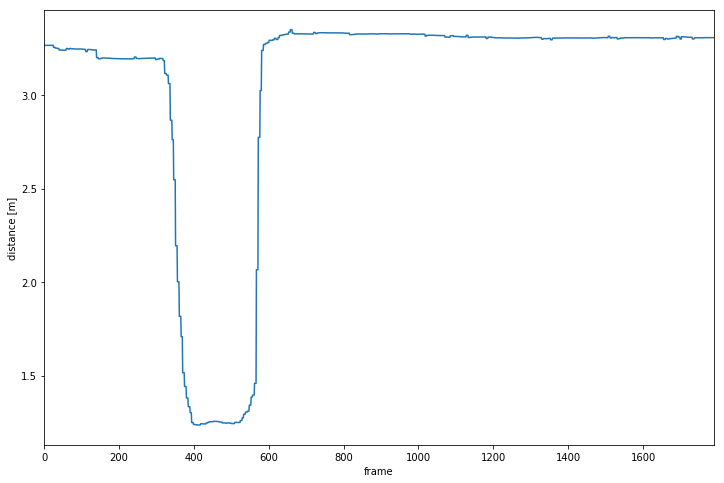

In [5]:
plt.xlabel('frame')
plt.ylabel('distance [m]')
m16_detections1.z16.plot(figsize=(12,8))

We see that between frames ~ 800 to 1000 the car is in view. Let's find out which frames these are and visualize them

In [15]:
segment_frames = m16_detections1.z15[m16_detections1.z15 < 1.5].index # the index corresponds to the frame number
segment_frames

Int64Index([452, 453, 454, 455, 456, 457, 458, 459, 460, 461,
            ...
            605, 606, 607, 608, 609, 610, 611, 612, 613, 614],
           dtype='int64', length=163)

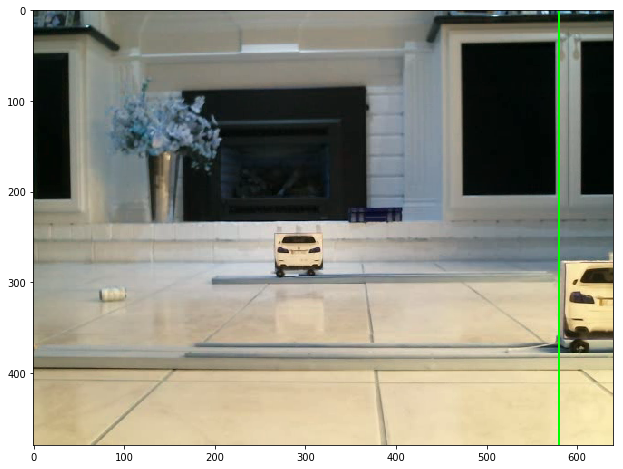

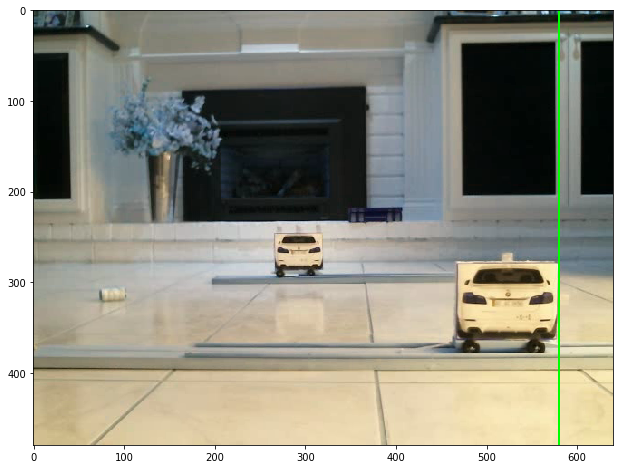

In [17]:
plt.figure(figsize=(12,8))
frame1 = get_frame(video_feed=video_feed1, frame_num=segment_frames.min())
frame2 = get_frame(video_feed=video_feed1, frame_num=segment_frames.max())
# 615
x_val = 580
cv2.line(frame1, (x_val, 0), (x_val, 480), (0,255,0), 2)
cv2.line(frame2, (x_val, 0), (x_val, 480), (0,255,0), 2)
plt.imshow(frame1)
plt.show()
plt.figure(figsize=(12,8))
plt.imshow(frame2)
plt.show()

In [67]:
# draw the detection distances on the video feed

def draw_lidar_spacing_lines(frame, frame_num, lidar_spacing_px=37, start_x_left=90, m16_readings=None):
    end_x_right = start_x_left + 16*lidar_spacing_px
    for seg, x_val in enumerate(range(start_x_left, end_x_right, lidar_spacing_px)):
        cv2.line(frame, (x_val, 0), (x_val, 480), (0,255,0), 2)
#         print(x_val)
        if m16_readings is not None:
            # scale m16 reading btwn 0 and 480
            y_val_m = m16_detections1['z{}'.format(seg + 1)][frame_num]
            min_y_m = 0 # 0 meters as min
            max_y_m = 4 # 4 meters as max
            y_val_normalized = (y_val_m - min_y_m)/(max_y_m - min_y_m)
            y_val_px = int(y_val_normalized * 480)
            center = (x_val, y_val_px)
            cv2.circle(frame, center, 5, (255,0,0), -1)
#             print(x_val)
    return frame

fourcc = cv2.VideoWriter_fourcc(*'XVID')
frame = get_frame(video_feed1, 0)
vw = cv2.VideoWriter('out.avi', fourcc, 20.0, (frame.shape[1], frame.shape[0]))
num_frames = int(video_feed1.get(cv2.CAP_PROP_FRAME_COUNT))

lidar_spacing_px = 38
start_x_left = 615 - lidar_spacing_px*15
for frame_num in range(0, num_frames):
    frame = get_frame(video_feed=video_feed1, frame_num=frame_num)
    frame_draw = draw_lidar_spacing_lines(frame, 
                                          frame_num=frame_num, 
                                          start_x_left=start_x_left, 
                                          lidar_spacing_px=lidar_spacing_px,
                                          m16_readings=m16_detections1)
    vw.write(frame_draw)
#     plt.figure(figsize=(12,8))
#     plt.imshow(frame_draw)
#     plt.show()